In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('test.csv',index_col='PassengerId')

In [3]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


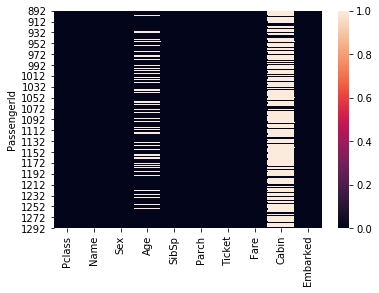

In [4]:
sns.heatmap(df.isnull())

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
imp = IterativeImputer(min_value=0)

In [7]:
imp.fit(df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1))

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=0, missing_values=nan,
                 n_nearest_features=None, random_state=None,
                 sample_posterior=False, tol=0.001, verbose=0)

In [8]:
imputed = imp.transform(df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1))

In [11]:
df['Age'] = imputed[:,1]

In [14]:
df['Fare'] = imputed[:,4]

In [15]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
sum(df.isnull()['Fare'])

0

In [17]:
df.drop(['Cabin'],axis=1,inplace=True)

In [18]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
def num_names(name):
    '''
    Returns an integer giving the number of names (ie. first, middle and last provided)
    '''
    
    return len(name.split())

In [20]:
def name_title(name):
    '''
    Returns a 1 if title different to standard titles (miss,mr,mrs) and 0 if standard
    ''' 
    standard = ['Mr.','Mrs.','Miss.']
    
    title = name.split(',')[1].split()[0]
    
    if title not in standard:
        return 1
    else:
        return 0    

In [21]:
def ticket_prefix(ticket):
    '''
    Returns a 1 if the ticket number has a prefix and 0 if not
    '''
    if len(ticket.split()) > 1:
        return 1
    else:
        return 0

In [22]:
df['Titles'] = df['Name'].apply(name_title)

In [23]:
df['Number_Names'] = df['Name'].apply(num_names)

In [24]:
df['Ticket Prefix'] = df['Ticket'].apply(ticket_prefix)

In [25]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
df = pd.concat([df,sex,embark],axis=1)

In [26]:
df.drop(['Name','Ticket','Sex','Embarked'],axis=1,inplace=True)

In [27]:
df.head()

,Pclass,Age,SibSp,Parch,Fare,Titles,Number_Names,Ticket Prefix,male,Q,S
PassengerId,,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,3,0,1,1,0
893,3,47.0,1,0,7.0000,0,5,0,0,0,1
894,2,62.0,0,0,9.6875,0,4,0,1,1,0
895,3,27.0,0,0,8.6625,0,3,0,1,0,1
896,3,22.0,1,1,12.2875,0,6,0,0,0,1


In [28]:
pwd

'/Users/morrell53/Python 3/Kaggle Competitions/TItanic'

In [29]:
df.to_csv(r'ITIM_Format_Test.csv', index = True)